# LF Log Data Analysis

This notebook analyzes the LF operation log data. The goals are:
1. Read data from `LF-Log.csv`.
2. Handle missing data.
3. Normalize date and time columns.
4. Fix the 'ngay' column (convert 1-31 to full dates in December).
5. Perform EDA.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

## 1. Load Data

In [44]:
file_path = 'LF-Log.csv'
df = pd.read_csv(file_path)

# Display first few rows and info
display(df.head())
display(df.info())

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C,Si,Mn,S,P,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu,C.1,Si.1,Mn.1,S.1,P.1,Al,Ca.1,lan_1,ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu
0,01/12/2025,1A,D7695,SAE1006-Al,07:43:00,07:48:00,08:15:00,08:27:00,6.0,1.0,1540.0,0.03,0.008,0.11,0.010,0.01,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,110.0,800.0,NaN,NaN,NaN,NaN,380.0,NaN,NaN,NaN,0.03,0.017,0.15,0.004,0.01,269.0,33.0,1587.0,1578.0,NaN,NaN,95,"NỐI THAN,CHỜ THÉP",NaN,08:18:00,08:25:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
1,NaN,1A,C7518,SAE1006-Al,08:10:00,08:20:00,NaN,NaN,43.0,1.0,1586.0,0.02,0.010,0.11,0.009,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mẻ vượt Si chuyển mác,NaN,NaN,NaN,00:00:00,ĐEN,BÌNH THƯỜNG,NaN
2,NaN,1A,A7129,SAE1006-Al,09:00:00,09:07:00,09:26:00,09:36:00,14.0,1.0,1556.0,0.03,0.005,0.07,0.008,0.012,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,100.0,750.0,NaN,NaN,NaN,NaN,380.0,NaN,NaN,NaN,0.04,0.017,0.15,0.004,0.014,313.0,32.0,1586.0,1580.0,NaN,NaN,NaN,NaN,NaN,09:28:00,09:35:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
3,NaN,1A,A7130,SAE1006-Al,09:38:00,09:41:00,09:58:00,10:08:00,20.0,1.0,1556.0,0.02,0.009,0.10,0.008,0.015,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,120.0,800.0,NaN,NaN,NaN,NaN,400.0,NaN,NaN,NaN,0.03,0.018,0.16,0.003,0.016,291.0,37.0,1588.0,1579.0,NaN,NaN,NaN,NaN,NaN,10:00:00,10:07:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
4,NaN,1A,A7132,SAE1006-Al,11:48:00,11:53:00,13:16:00,13:30:00,6.0,1.0,1619.0,0.03,0.005,0.08,0.018,0.006,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,140.0,800.0,NaN,NaN,NaN,NaN,420.0,NaN,NaN,NaN,0.04,0.014,0.16,0.003,0.007,275.0,41.0,1600.0,1610.0,NaN,NaN,NaN,NaN,NaN,13:20:00,13:28:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ngay                                  1701 non-null   object 
 1   Ca                                    1715 non-null   object 
 2   me_tinh_luyen_so                      1728 non-null   object 
 3   mac_thep_yeu_cau                      1728 non-null   object 
 4   thoi_gian_vao_tinh_luyen              1728 non-null   object 
 5   bat_dau                               1727 non-null   object 
 6   ket_thuc                              1716 non-null   object 
 7   thoi_gian_len_duc                     1709 non-null   object 
 8   thung_lf                              1728 non-null   object 
 9   lan_luyen_thu                         1728 non-null   float64
 10  nhiet_do_vao_tl                       1728 non-null   float64
 11  C                

None

## 2. Data Cleaning & Preprocessing

### 2.1 Fix 'ngay' (Date) column
The 'ngay' column contains mixed formats: full dates (e.g., '01/12/2025'), integers (1-31), or NaN. We need to standardize this to a Datetime object representing December 2025.

In [45]:
def clean_date(val):
    if pd.isna(val) or val == '':
        return np.nan
    
    str_val = str(val).strip()
    
    # Check if it looks like a full date (contains '/')
    if '/' in str_val:
        return pd.to_datetime(str_val, dayfirst=True)
    
    # Assume it's a day number if it's digit-like
    try:
        day = int(float(str_val))
        # Construct date for Dec 2025
        return pd.Timestamp(year=2025, month=12, day=day)
    except ValueError:
        return np.nan

# Apply cleaning
df['ngay_clean'] = df['ngay'].apply(clean_date)

# Forward fill missing dates (assuming blank means same as previous)
df['ngay_clean'] = df['ngay_clean'].ffill()

# Check stats
print("Unique dates found:")
print(df['ngay_clean'].unique())

# Update the main column or drop the old one if verified
# df['ngay'] = df['ngay_clean']

Unique dates found:
<DatetimeArray>
['2025-12-01 00:00:00', '2025-12-02 00:00:00', '2025-12-03 00:00:00',
 '2025-12-04 00:00:00', '2025-12-05 00:00:00', '2025-12-06 00:00:00',
 '2025-12-07 00:00:00', '2025-12-08 00:00:00', '2025-12-09 00:00:00',
 '2025-12-10 00:00:00', '2025-12-11 00:00:00', '2025-12-12 00:00:00',
 '2025-12-13 00:00:00', '2025-12-14 00:00:00', '2025-12-15 00:00:00',
 '2025-12-16 00:00:00', '2025-12-17 00:00:00', '2025-12-18 00:00:00',
 '2025-12-19 00:00:00', '2025-12-20 00:00:00', '2025-12-21 00:00:00',
 '2025-12-22 00:00:00', '2025-12-23 00:00:00', '2025-12-24 00:00:00',
 '2025-12-25 00:00:00', '2025-12-26 00:00:00', '2025-12-28 00:00:00',
 '2025-12-27 00:00:00', '2025-12-29 00:00:00', '2025-12-30 00:00:00',
 '2025-12-31 00:00:00']
Length: 31, dtype: datetime64[ns]


### 2.2 Handle Missing Data
Evaluate missing values.

In [46]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

ngay                                      27
Ca                                        13
bat_dau                                    1
ket_thuc                                  12
thoi_gian_len_duc                         19
C                                          5
Si                                         5
Mn                                         5
S                                          5
P                                          5
khoi_luong_thung_thep                   1728
FeSi                                    1724
FeMn                                       9
SiMn                                    1725
than                                    1599
FeCr                                    1728
FeV                                     1728
Niken                                   1728
FeP                                     1728
Cu                                      1728
khac                                    1027
huynh_thach                             1713
nhom_thoi 

In [47]:
# Strategy for filling missing values:
# - Additive columns (FeSi, FeMn, than, etc.) likely mean 0 additions if empty.
# - Logistical info (Time, Temperature) might be better left as NaN or interpolated depending on context.

# List of columns that are likely additives/measurements where NaN = 0
additive_cols = [
    'FeSi', 'FeMn', 'SiMn', 'than', 'FeCr', 'FeV', 'Niken', 'FeP', 'Cu', 'khac', 
    'huynh_thach', 'nhom_thoi', 'voi_song', 'dolomite', 'quaczit', 
    'day_feca', 'day_casi', 'day_ca_dac', 'xi_bao_on'
]

# Fill these with 0
for col in additive_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("Missing values after filling additives:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after filling additives:
ngay                                      27
Ca                                        13
bat_dau                                    1
ket_thuc                                  12
thoi_gian_len_duc                         19
C                                          5
Si                                         5
Mn                                         5
S                                          5
P                                          5
khoi_luong_thung_thep                   1728
thoi_gian_danh_dien                      807
tieu_thu                                 806
C.1                                       42
Si.1                                      42
Mn.1                                      44
S.1                                       44
P.1                                       44
Al                                        45
Ca.1                                      45
lan_1                                     31
ra_thep        

### 2.3 Normalize Time Columns
Convert time strings to datetime objects, combining with the cleaning Date.

In [48]:
time_cols = [
    'thoi_gian_vao_tinh_luyen', 'bat_dau', 'ket_thuc', 'thoi_gian_len_duc',
    'thoi_gian_bat_dau_thoi_mem', 'thoi_gian_ket_thu_thoi_mem'
]

def combine_date_time(row, time_col_name, date_col_name='ngay_clean'):
    time_val = row[time_col_name]
    date_val = row[date_col_name]
    
    if pd.isna(time_val) or pd.isna(date_val):
        return pd.NaT
    
    try:
        # Parse time string possibly in various formats or just HH:MM:SS
        str_time = str(time_val).strip()
        # Handle cases like "08:00" or "08:00:00"
        
        # Create a dummy timestamp to extract time
        parsed_time = pd.to_datetime(str_time, format='%H:%M:%S', errors='coerce')
        if pd.isna(parsed_time):
             parsed_time = pd.to_datetime(str_time, format='%H:%M', errors='coerce')
        
        if pd.isna(parsed_time):
            return pd.NaT
            
        h, m, s = parsed_time.hour, parsed_time.minute, parsed_time.second
        
        full_dt = date_val.replace(hour=h, minute=m, second=s)
        
        # Handle midnight crossing if necessary (though simple combination doesn't know context yet)
        # We'll refine this later if we see start > end
        return full_dt
    except Exception as e:
        return pd.NaT

for col in time_cols:
    if col in df.columns:
        df[col + '_dt'] = df.apply(combine_date_time, axis=1, args=(col,))

# Handle Midnight Crossing for 'ket_thuc' (End Time)
# If End Time < Start Time, assume next day
# Using 'bat_dau' (Start) vs 'ket_thuc' (End)
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    mask = df['ket_thuc_dt'] < df['bat_dau_dt']
    df.loc[mask, 'ket_thuc_dt'] += pd.Timedelta(days=1)
    print(f"Adjusted {mask.sum()} rows for midnight crossing.")

display(df[['ngay_clean', 'bat_dau_dt', 'ket_thuc_dt']].head(10))

Adjusted 41 rows for midnight crossing.


,ngay_clean,bat_dau_dt,ket_thuc_dt
0,2025-12-01,2025-12-01 07:48:00,2025-12-01 08:15:00
1,2025-12-01,2025-12-01 08:20:00,NaT
2,2025-12-01,2025-12-01 09:07:00,2025-12-01 09:26:00
3,2025-12-01,2025-12-01 09:41:00,2025-12-01 09:58:00
4,2025-12-01,2025-12-01 11:53:00,2025-12-01 13:16:00
5,2025-12-01,2025-12-01 12:29:00,2025-12-01 14:00:00
6,2025-12-01,2025-12-01 14:07:00,2025-12-01 14:47:00
7,2025-12-01,2025-12-01 14:52:00,2025-12-01 15:23:00
8,2025-12-01,2025-12-01 15:27:00,2025-12-01 16:00:00
9,2025-12-01,2025-12-01 16:05:00,2025-12-01 16:41:00


In [49]:
df.sample(10)

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C,Si,Mn,S,P,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu,C.1,Si.1,Mn.1,S.1,P.1,Al,Ca.1,lan_1,ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu,ngay_clean,thoi_gian_vao_tinh_luyen_dt,bat_dau_dt,ket_thuc_dt,thoi_gian_len_duc_dt,thoi_gian_bat_dau_thoi_mem_dt,thoi_gian_ket_thu_thoi_mem_dt
538,18,1B,C8069,SAE1006-Al,17:35:00,17:53:00,18:30:00,18:42:00,14.0,1.0,1550.0,0.020,0.002,0.120,0.010,0.01,NaN,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,80.0,750.0,0.0,0.0,0.0,0.0,330.0,0.0,NaN,NaN,0.03,0.019,0.150,0.002,0.013,262.0,38.0,1586.0,1580.0,1575-1580,NaN,NaN,NaN,NaN,18:33:00,18:41:00,7.999999999999972,ĐEN,BÌNH THƯỜNG,NaN,2025-12-18,2025-12-18 17:35:00,2025-12-18 17:53:00,2025-12-18 18:30:00,2025-12-18 18:42:00,2025-12-18 18:33:00,2025-12-18 18:41:00
745,25,2B,B8124,SAE1006Al-V1,02:35:00,03:00:00,03:33:00,03:46:00,19.0,1.0,1540.0,0.020,0.003,0.130,0.006,0.007,NaN,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,75.0,700.0,0.0,0.0,0.0,0.0,360.0,0.0,NaN,NaN,0.03,0.010,0.160,0.003,0.008,243.0,30.0,1585.0,1581.0,NaN,NaN,NaN,NaN,NaN,03:36:00,03:44:00,8.00000000000001,ĐEN,BÌNH THƯỜNG,NaN,2025-12-25,2025-12-25 02:35:00,2025-12-25 03:00:00,2025-12-25 03:33:00,2025-12-25 03:46:00,2025-12-25 03:36:00,2025-12-25 03:44:00
1310,17.0,2A,B7874,SAE1006AL,05:32:00,05:37:00,05:55:00,06:08:00,3,1.0,1560.0,0.030,0.010,0.130,0.008,0.013,NaN,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,500.0,0.0,0.0,0.0,0.0,330.0,0.0,13:27,2638.0,0.035,0.017,0.170,0.005,0.013,298.0,28.0,1591.0,1577.0,1575-1585,NaN,NaN,NaN,NaN,05:59:00,06:07:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN,2025-12-17,2025-12-17 05:32:00,2025-12-17 05:37:00,2025-12-17 05:55:00,2025-12-17 06:08:00,2025-12-17 05:59:00,2025-12-17 06:07:00
897,4.0,1A,B7459,SAE1006AL,18:01:00,18:05:00,18:37:00,18:53:00,42,1.0,1540.0,0.040,0.007,0.120,0.005,0.005,NaN,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,700.0,0.0,0.0,0.0,0.0,350.0,0.0,19:51,5023.0,0.04,0.009,0.160,0.003,0.005,301.0,31.0,1590.0,1582.0,1578-1580,NaN,NaN,NaN,NaN,18:42:00,18:50:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN,2025-12-04,2025-12-04 18:01:00,2025-12-04 18:05:00,2025-12-04 18:37:00,2025-12-04 18:53:00,2025-12-04 18:42:00,2025-12-04 18:50:00
418,14,2A,C7943,SAE1006-Al,21:00:00,21:23:00,21:45:00,22:12:00,34.0,1.0,1552.0,0.030,0.008,0.120,0.004,0.006,NaN,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,70.0,650.0,0.0,0.0,0.0,0.0,350.0,0.0,NaN,NaN,0.03,0.015,0.160,0.002,0.006,298.0,34.0,1593.0,1582.0,1575-1580,NaN,NaN,NaN,NaN,22:02:00,22:10:00,8.000000000000131,ĐEN,BÌNH THƯỜNG,NaN,2025-12-14,2025-12-14 21:00:00,2025-12-14 21:23:00,2025-12-14 21:45:00,2025-12-14 22:12:00,2025-12-14 22:02:00,2025-12-14 22:10:00
637,21,2C,B8005,SAE1006Al-V1,05:50:00,06:03:00,06:37:00,06:50:00,21.0,1.0,1573.0,0.025,0.005,0.125,0.006,0.013,NaN,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,80.0,800.0,0.0,0.0,0.0,0.0,330.0,0.0,NaN,NaN,0.033,0.012,0.158,0.003,0.012,274.0,35.0,1575.0,1580.0,1578-1583,NaN,NaN,NaN,NaN,06:40:00,06:48:00,7.999999999999972,ĐEN,BÌNH THƯỜNG,NaN,2025-12-21,2025-12-21 05:50:00,2025-12-21 06:03:00,2025-12-21 06:37:00,2025-12-21 06:50:00,2025-12-21 06:40:00,2025-12-21 06:48:00
972,7.0,1A,A7321,SAE1006AL,17:10:00,17:18:00,17:49:00,18:03:00,19,1.0,1535.0,0.040,0.011,0.130,0.003,0.011,NaN,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,600.0,0.0,0.0,0.0,0.0,280.0,0.0,19:12,4911.0,0.05,0.011,0.150,0.003,0.011,262.0,33.0,1586.0,1583.0,1578-1583,NaN,NaN,NaN,NaN,17:53:00,18:01:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN,2025-12-07,2025-12-07 17:10:00,2025-12-07 17:18:00,2025-12-07 17:49:00,2025-12-07 18:03:00,2025-12-07 17:53:00

In [50]:
for col in time_cols:
    dt_col = f"{col}_dt"
    if dt_col in df.columns:
        df[col] = df.pop(dt_col)

if 'ngay_clean' in df.columns:
    df['ngay'] = df.pop('ngay_clean')

In [51]:
df

,ngay,Ca,me_tinh_luyen_so,mac_thep_yeu_cau,thoi_gian_vao_tinh_luyen,bat_dau,ket_thuc,thoi_gian_len_duc,thung_lf,lan_luyen_thu,nhiet_do_vao_tl,C,Si,Mn,S,P,khoi_luong_thung_thep,FeSi,FeMn,SiMn,than,FeCr,FeV,Niken,FeP,Cu,khac,huynh_thach,nhom_thoi,voi_song,dolomite,quaczit,day_feca,day_casi,day_ca_dac,xi_bao_on,thoi_gian_danh_dien,tieu_thu,C.1,Si.1,Mn.1,S.1,P.1,Al,Ca.1,lan_1,ra_thep,nhiet_do_duc_yeu_cau,nhiet_do_do_tren_duc,thoi_gian_dinh_tre,ly_do_dinh_tre,ghi_chu_1,thoi_gian_bat_dau_thoi_mem,thoi_gian_ket_thu_thoi_mem,tong_thoi_gian_thoi_mem,tinh_trang_xi_lo_thoi_qua_tinh_luyen,tinh_trang_xi,ghi_chu
0,2025-12-01,1A,D7695,SAE1006-Al,2025-12-01 07:43:00,2025-12-01 07:48:00,2025-12-01 08:15:00,2025-12-01 08:27:00,6.0,1.0,1540.0,0.030,0.008,0.110,0.010,0.01,NaN,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,110.0,800.0,0.0,0.0,0.0,0.0,380.0,0.0,NaN,NaN,0.03,0.017,0.150,0.004,0.01,269.00,33.00,1587.0,1578.0,NaN,NaN,95,"NỐI THAN,CHỜ THÉP",NaN,2025-12-01 08:18:00,2025-12-01 08:25:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
1,2025-12-01,1A,C7518,SAE1006-Al,2025-12-01 08:10:00,2025-12-01 08:20:00,NaT,NaT,43.0,1.0,1586.0,0.020,0.010,0.110,0.009,0.013,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mẻ vượt Si chuyển mác,NaN,NaT,NaT,00:00:00,ĐEN,BÌNH THƯỜNG,NaN
2,2025-12-01,1A,A7129,SAE1006-Al,2025-12-01 09:00:00,2025-12-01 09:07:00,2025-12-01 09:26:00,2025-12-01 09:36:00,14.0,1.0,1556.0,0.030,0.005,0.070,0.008,0.012,NaN,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,100.0,750.0,0.0,0.0,0.0,0.0,380.0,0.0,NaN,NaN,0.04,0.017,0.150,0.004,0.014,313.00,32.00,1586.0,1580.0,NaN,NaN,NaN,NaN,NaN,2025-12-01 09:28:00,2025-12-01 09:35:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
3,2025-12-01,1A,A7130,SAE1006-Al,2025-12-01 09:38:00,2025-12-01 09:41:00,2025-12-01 09:58:00,2025-12-01 10:08:00,20.0,1.0,1556.0,0.020,0.009,0.100,0.008,0.015,NaN,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,120.0,800.0,0.0,0.0,0.0,0.0,400.0,0.0,NaN,NaN,0.03,0.018,0.160,0.003,0.016,291.00,37.00,1588.0,1579.0,NaN,NaN,NaN,NaN,NaN,2025-12-01 10:00:00,2025-12-01 10:07:00,00:07:00,ĐEN,BÌNH THƯỜNG,NaN
4,2025-12-01,1A,A7132,SAE1006-Al,2025-12-01 11:48:00,2025-12-01 11:53:00,2025-12-01 13:16:00,2025-12-01 13:30:00,6.0,1.0,1619.0,0.030,0.005,0.080,0.018,0.006,NaN,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,140.0,800.0,0.0,0.0,0.0,0.0,420.0,0.0,NaN,NaN,0.04,0.014,0.160,0.003,0.007,275.00,41.00,1600.0,1610.0,NaN,NaN,NaN,NaN,NaN,2025-12-01 13:20:00,2025-12-01 13:28:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2025-12-31,2B,C8481,SAE1006AL-V1,2025-12-31 02:53:00,2025-12-31 03:28:00,2025-12-31 03:59:00,2025-12-31 04:12:00,29,1.0,1548.0,0.029,0.005,0.130,0.004,0.011,NaN,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,650.0,0.0,0.0,0.0,0.0,400.0,0.0,21:14,4993.0,0.04,0.009,0.163,0.002,0.01,311.86,24.33,1581.0,1576.0,1585-1585,NaN,NaN,NaN,NaN,2025-12-31 04:01:00,2025-12-31 04:09:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN
1724,2025-12-31,2B,C8482,SAE1006AL-V1,2025-12-31 03:49:00,2025-12-31 04:01:00,2025-12-31 04:40:00,2025-12-31 04:53:00,11,1.0,1527.0,0.033,0.004,0.129,0.006,0.012,NaN,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,900.0,0.0,0.0,0.0,0.0,380.0,0.0,26:29,5150.0,0.033,0.010,0.163,0.003,0.011,271.67,34.45,1583.0,1578.0,1578-1585,NaN,NaN,NaN,NaN,2025-12-31 04:42:00,2025-12-31 04:50:00,00:08:00,ĐEN,BÌNH THƯỜNG,NaN
1725,2025-12-31,2B,C8483,SAE1006AL-V1,2025-12-31 04:16:00,2025-12-31 04:42:00,2025-12-31 05:19:00,2025-12-31 05:33:00,9,1.0,1529.0,0.033,0.003,0.115,0.009,0.007,NaN,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,850.0,0.0,0.0,0.0,0.0,400.0,0.0,27:37,5745.0,0.041,0.009,0.162,0.004,0.007,268.94,31.86,1580.0,1575.0,1585-1586,NaN,NaN,NaN,NaN,2025-12-31 05:21:00,2025-12-31 05:29:00,00:08:00,ĐEN

## 3. EDA (Exploratory Data Analysis)

### 3.1 Processing Time Analysis

In [52]:
# Calculate duration in minutes
if 'bat_dau_dt' in df.columns and 'ket_thuc_dt' in df.columns:
    df['processing_duration_min'] = (df['ket_thuc_dt'] - df['bat_dau_dt']).dt.total_seconds() / 60

    plt.figure(figsize=(10, 5))
    sns.histplot(df['processing_duration_min'], bins=30, kde=True)
    plt.title('Distribution of Processing Duration (Minutes)')
    plt.xlabel('Minutes')
    plt.show()
    
    print(df['processing_duration_min'].describe())

### 3.2 Alloy Consumption

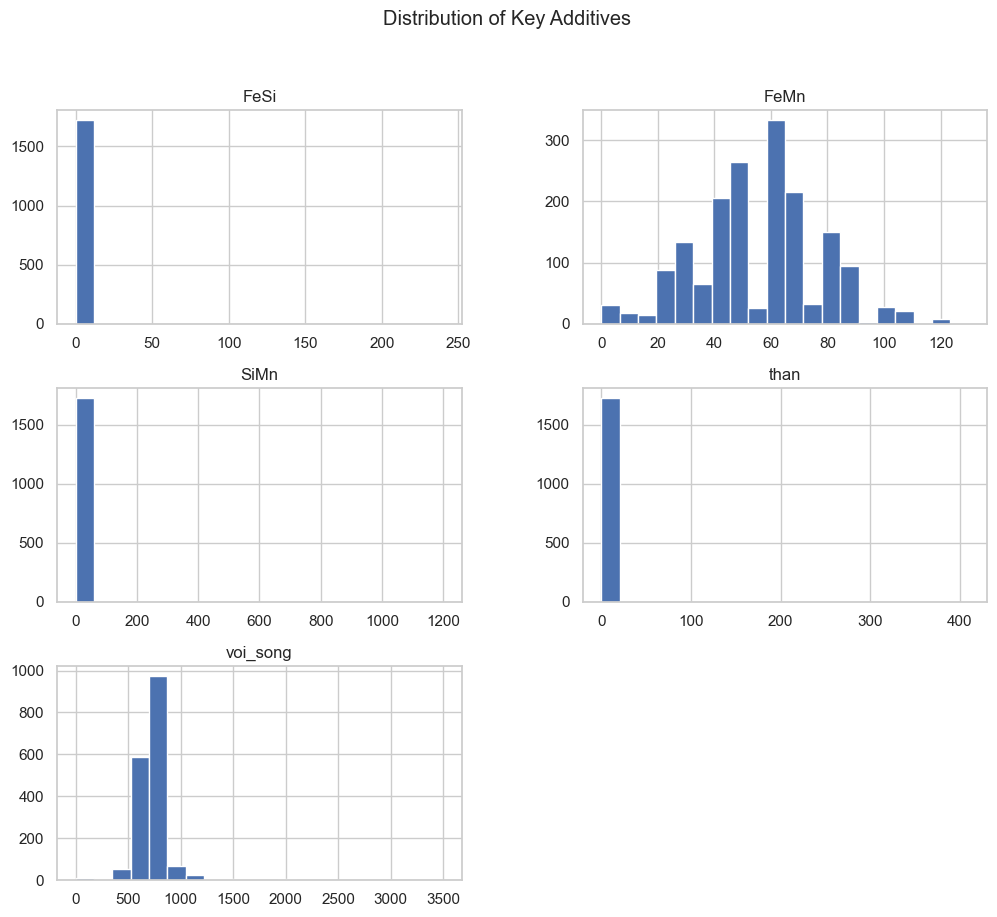

In [53]:
additives = ['FeSi', 'FeMn', 'SiMn', 'than', 'voi_song']
existing_additives = [col for col in additives if col in df.columns]

if existing_additives:
    df[existing_additives].hist(figsize=(12, 10), bins=20)
    plt.suptitle("Distribution of Key Additives")
    plt.show()

### 3.3 Production Count by Day

In [54]:
daily_counts = df.groupby(df['ngay_clean'].dt.day).size()

plt.figure(figsize=(12, 5))
daily_counts.plot(kind='bar')
plt.title('Number of Heats per Day in December')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

KeyError: 'ngay_clean'

### 3.4 Temperature Drop Analysis
Difference between 'nhiet_do_vao_tl' (Input Temp) and 'nhiet_do_ra_thep' (Output Temp if available) or target.

Temperature columns: ['nhiet_do_vao_tl', 'nhiet_do_duc_yeu_cau', 'nhiet_do_do_tren_duc']


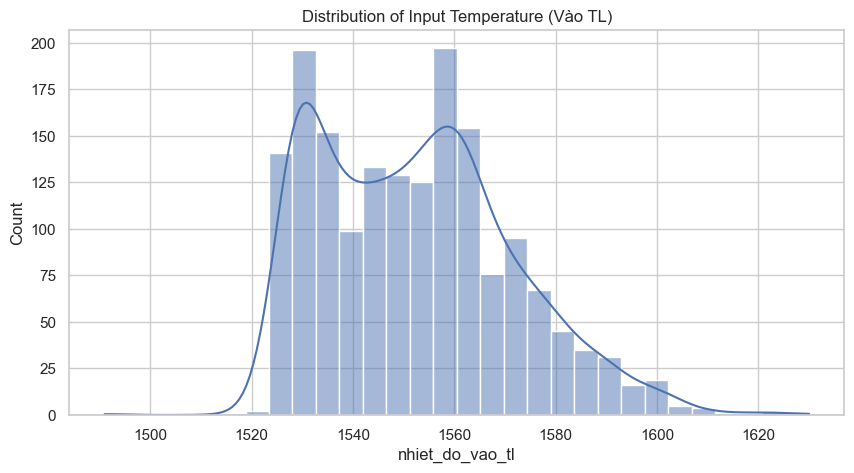

In [ ]:
# Example: Check columns for temperature
temp_cols = [c for c in df.columns if 'nhiet' in c.lower()]
print("Temperature columns:", temp_cols)

if 'nhiet_do_vao_tl' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['nhiet_do_vao_tl'].dropna(), kde=True)
    plt.title('Distribution of Input Temperature (Vào TL)')
    plt.show()

In [ ]:
print("=== BASIC STATISTICS ===")
print(f"Total records: {len(df)}")
print(f"Date range: {df['ngay'].min()} to {df['ngay'].max()}")
print(f"Steel grades: {df['mac_thep_yeu_cau'].unique()}")
print(f"\nShifts distribution:")
print(df['Ca'].value_counts())

=== BASIC STATISTICS ===
Total records: 1728
Date range: 2025-12-01 00:00:00 to 2025-12-31 00:00:00
Steel grades: ['SAE1006-Al' 'SAE1006Al-V1' 'SAE1006Al-V2' 'SAE1006AL V1' 'SAE1006ALV1'
 'SAE1006ALV2' 'SAE1006AL' 'SAE1006AL-V1' 'SAE1006AL-V2']

Shifts distribution:
Ca
2A    323
2B    306
2C    291
1B    277
1A    264
1C    254
Name: count, dtype: int64


In [ ]:
key_numeric_cols = ['nhiet_do_vao_tl', 'lan_1', 'ra_thep', 'Al', 'FeMn', 'nhom_thoi', 'voi_song', 'day_ca_dac']
df[key_numeric_cols].describe()

,nhiet_do_vao_tl,lan_1,ra_thep,Al,FeMn,nhom_thoi,voi_song,day_ca_dac
count,1728.000000,1697.000000,1695.000000,1683.000000,1728.000000,1728.000000,1728.00000,1728.000000
mean,1552.429398,1585.001179,1574.859587,274.814177,55.429977,99.887731,715.26331,350.905671
std,19.089728,359.835481,100.459953,32.761326,22.025746,39.468518,160.97678,63.589582
min,1491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1536.000000,1570.000000,1578.000000,258.995000,40.000000,75.000000,650.00000,320.000000
50%,1552.000000,1585.000000,1580.000000,276.160000,60.000000,95.000000,700.00000,350.000000
75%,1564.250000,1590.000000,1582.000000,293.000000,70.000000,120.000000,758.75000,390.000000
max,1630.000000,15877.000000,1858.000000,432.000000,130.000000,400.000000,3500.00000,670.000000


In [ ]:
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print("=== MISSING DATA (%) ===")
print(missing_pct)

=== MISSING DATA (%) ===
khoi_luong_thung_thep                   100.00
ghi_chu                                  99.94
ghi_chu_1                                99.71
nhiet_do_do_tren_duc                     98.26
thoi_gian_dinh_tre                       96.59
ly_do_dinh_tre                           96.18
thoi_gian_danh_dien                      46.70
tieu_thu                                 46.64
nhiet_do_duc_yeu_cau                     12.04
thoi_gian_ket_thu_thoi_mem                3.18
Al                                        2.60
Ca.1                                      2.60
Mn.1                                      2.55
P.1                                       2.55
S.1                                       2.55
C.1                                       2.43
Si.1                                      2.43
thoi_gian_bat_dau_thoi_mem                2.26
thoi_gian_len_duc                         2.26
tinh_trang_xi                             1.91
ra_thep                            

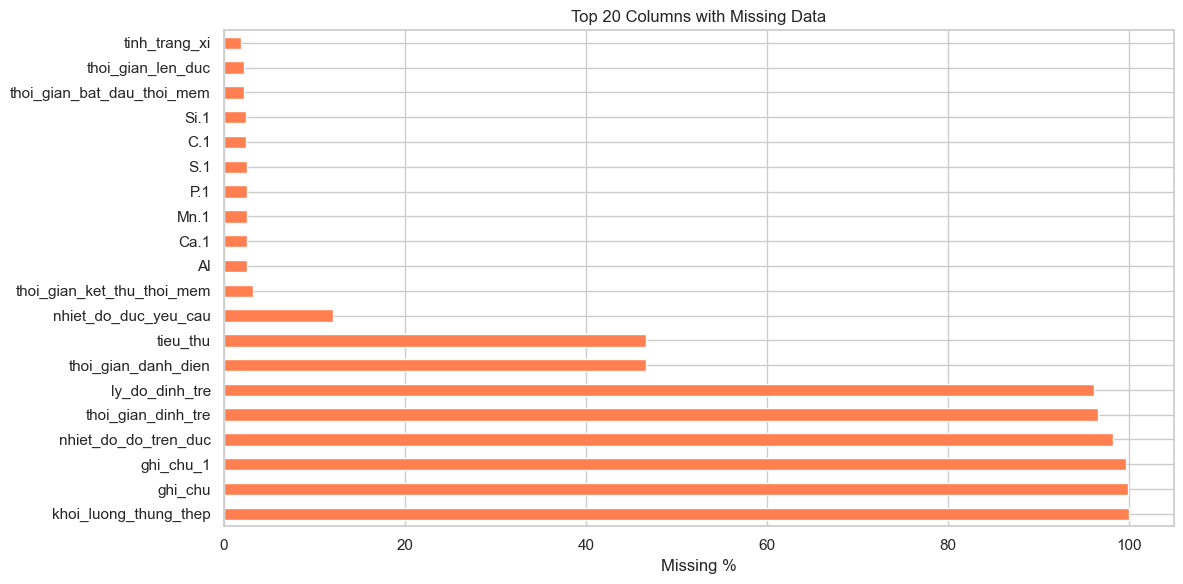

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
missing_pct.head(20).plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Missing %')
ax.set_title('Top 20 Columns with Missing Data')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate processing duration (minutes)
df['processing_time_min'] = (df['ket_thuc'] - df['bat_dau']).dt.total_seconds() / 60
df['wait_time_min'] = (df['bat_dau'] - df['thoi_gian_vao_tinh_luyen']).dt.total_seconds() / 60

print("=== PROCESSING TIME (minutes) ===")
print(df['processing_time_min'].describe())

print("\n=== WAIT TIME (minutes) ===")
print(df['wait_time_min'].describe())

=== PROCESSING TIME (minutes) ===
count    1699.000000
mean       40.967039
std        62.148385
min         0.000000
25%        31.000000
50%        35.000000
75%        41.000000
max      1413.000000
Name: processing_time_min, dtype: float64

=== WAIT TIME (minutes) ===
count    1714.000000
mean       -0.195449
std       142.870374
min     -1432.000000
25%         7.000000
50%        13.000000
75%        21.000000
max       101.000000
Name: wait_time_min, dtype: float64


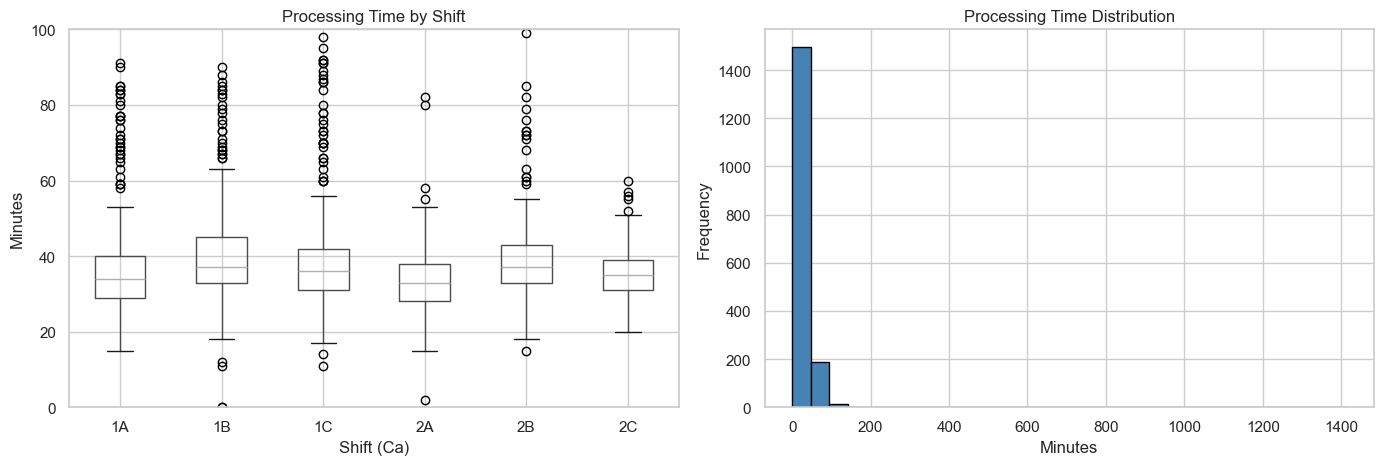

In [ ]:
# Processing time by shift
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot by shift
df.boxplot(column='processing_time_min', by='Ca', ax=axes[0])
axes[0].set_title('Processing Time by Shift')
axes[0].set_xlabel('Shift (Ca)')
axes[0].set_ylabel('Minutes')
axes[0].set_ylim(0, 100)

# Distribution
df['processing_time_min'].hist(bins=30, ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Processing Time Distribution')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('Frequency')

plt.suptitle('')
plt.tight_layout()
plt.show()

=== TEMPERATURE STATISTICS ===
       nhiet_do_vao_tl         lan_1      ra_thep
count      1728.000000   1697.000000  1695.000000
mean       1552.429398   1585.001179  1574.859587
std          19.089728    359.835481   100.459953
min        1491.000000      0.000000     0.000000
25%        1536.000000   1570.000000  1578.000000
50%        1552.000000   1585.000000  1580.000000
75%        1564.250000   1590.000000  1582.000000
max        1630.000000  15877.000000  1858.000000

Temperature Loss (lan_1 - ra_thep):
count     1695.000000
mean        10.144543
std        349.123341
min       -268.000000
25%        -10.000000
50%          5.000000
75%          9.000000
max      14294.000000
Name: temp_loss, dtype: float64


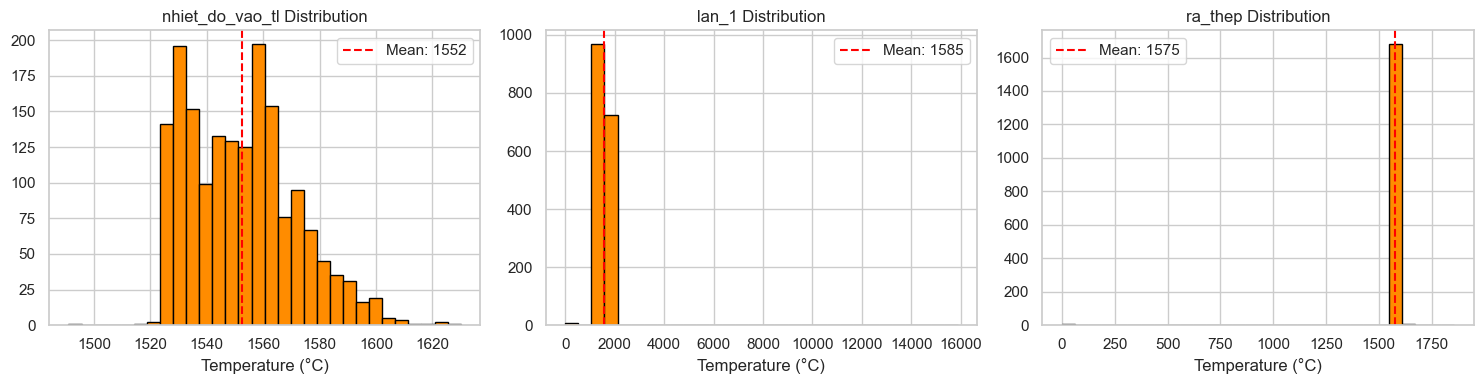

In [ ]:
# Temperature statistics
temp_cols = ['nhiet_do_vao_tl', 'lan_1', 'ra_thep']
print("=== TEMPERATURE STATISTICS ===")
print(df[temp_cols].describe())

# Temperature loss
df['temp_loss'] = df['lan_1'] - df['ra_thep']
print(f"\nTemperature Loss (lan_1 - ra_thep):")
print(df['temp_loss'].describe())

# %%
# Temperature distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(temp_cols):
    df[col].hist(bins=30, ax=axes[i], color='darkorange', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Temperature (°C)')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

=== ALUMINUM (Al) STATISTICS ===
count    1683.000000
mean      274.814177
std        32.761326
min         0.000000
25%       258.995000
50%       276.160000
75%       293.000000
max       432.000000
Name: Al, dtype: float64

Al by Shift:
          mean        std     min    max
Ca                                      
1A  275.042146  31.270073   24.00  390.0
1B  266.732962  45.765659    0.00  356.0
1C  277.365635  25.809269  212.51  362.0
2A  280.248408  29.089299   26.00  360.0
2B  271.355336  35.711526    0.00  432.0
2C  277.652657  23.667254  201.00  371.0


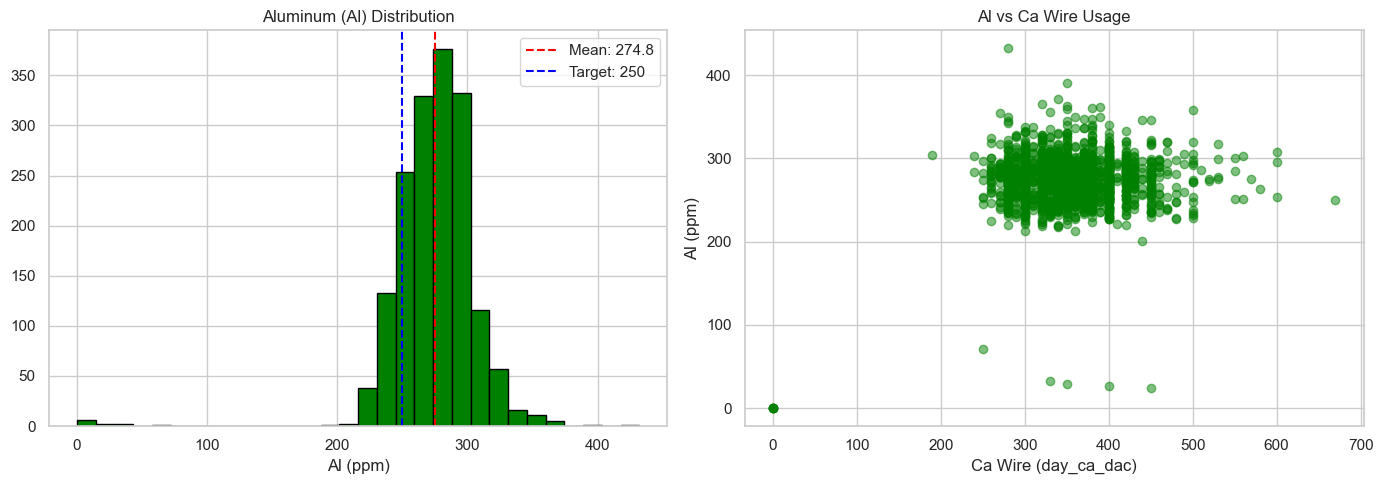

In [ ]:
# %% [markdown]
# ### 3.5 Aluminum (Al) Analysis

# %%
print("=== ALUMINUM (Al) STATISTICS ===")
print(df['Al'].describe())

# Al by shift
print("\nAl by Shift:")
print(df.groupby('Ca')['Al'].agg(['mean', 'std', 'min', 'max']))

# %%
# Al distribution and relationship with Ca wire
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Al histogram
df['Al'].hist(bins=30, ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Aluminum (Al) Distribution')
axes[0].set_xlabel('Al (ppm)')
axes[0].axvline(df['Al'].mean(), color='red', linestyle='--', label=f'Mean: {df["Al"].mean():.1f}')
axes[0].axvline(250, color='blue', linestyle='--', label='Target: 250')
axes[0].legend()

# Al vs Ca wire
axes[1].scatter(df['day_ca_dac'], df['Al'], alpha=0.5, c='green')
axes[1].set_xlabel('Ca Wire (day_ca_dac)')
axes[1].set_ylabel('Al (ppm)')
axes[1].set_title('Al vs Ca Wire Usage')

plt.tight_layout()
plt.show()